# Animation of and Solving Differential Equations for a Non-Linear Pendelum using Fourth-Order Runge-Kutta Numerical Method

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

## Task 1
The angular velocity $\frac{d \theta}{d t}$ and the angular acceleration $\frac{d \omega}{dt}$ of a simple pendelum setup are given by 2 differential equations which can be solved numerically:

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

where $\theta$ is the angle $(rad)$, $\omega$ is the angular velocity $(rad/s)$, $g$ is the gravitational acceleration $(~9.8 \ ms^{-1})$, $L$ is the length of the pendelum thread $(m)$ and $t$ is time $(s)$.

Defining a vector $\mathbf r$ as: 
$${\mathbf r} = (\theta, \omega, \ldots)$$

we can, therefore, write:

$$f_{\theta}(\mathbf r, t) = \frac{d \theta}{d t} = \omega
\\
\\
f_{\omega}(\mathbf r, t) = \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta$$





Also, defining  $\mathbf f$ as:

$${\mathbf f}(\mathbf r, t) = (f_{\theta}(\mathbf r, t), f_{\omega}(\mathbf r, t), \ldots)$$

We can now obtain an ODE of $\mathbf r$:
$$ \frac{d \mathbf{r}}{dt} = {\mathbf f}({\mathbf r},t),$$

This is a differential equation that can be solved numerically to obtain $\theta$ and $\omega$. First, we start off by defining the function ${\mathbf f}(\mathbf r, t)$ which represents the pendelum's motion:

In [2]:

def pendelum_motion(r,t):
    '''Definition of the vector function to be solved for the pendelum bob 
    subject to acceleration
    Inputs:
    r: vector of angular position (r[0]) and angular velocity (r[1])
    t: time point'''
    
    theta = r[0] # first element of r represents the angular position of the pendelum bob
    omega = r[1] # second element of r represents the angular velocoty of the pendelum bob
    f_theta = omega
    f_omega = (-g/L)*np.sin(theta)
    
    return np.array([f_theta,f_omega],float) # convert f_theta and f_omega to an array form and ensure it's a float

Now we calculate our time array between $t=0 s$ and $t=20 s$ and also define initial conditions and therefore initial $\mathbf r$.

In [3]:
#The follwing code is pasted from 3rd code cell of 'PHAS0029 Session 7: More Ordinary Differential Equations', Author: Louise Dash louise.dash@ucl.ac.uk

#time array:
tstart = 0.0 #start time
tend = 20.0  #end time
N = 1000     #number of points for Runge-Kutta
h = (tend - tstart)/N  #step length

#define an array of timepoints
tpoints = np.arange(tstart, tend, h)

#define the initial conditions in an array:
#at t = 0, theta = 0.99pi and omega = 0

initialtheta= 0.99*np.pi
initialomega=0
r = np.array([initialtheta,initialomega]) #initial r array

#also define g and L:
g=9.8 #m/s^2
L=1 #m

## Task 2:
Next, we define our 4th-order Runge-Kutta function as displayed below:

$$
k_1 = h f(r,t), \\
k_2 = h f(r+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 = h f(r+\frac{1}{2}k_2, t+\frac{1}{2}h), \\
k_4 = h f(r+k_3, t+h), \\
r(t+h) = r(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
$$

In [4]:
#The follwing code is pasted from 4th code cell of 'PHAS0029 Session 7: More Ordinary Differential Equations', Author: Louise Dash louise.dash@ucl.ac.uk


def RungeKutta2d(r,tpoints,function):
    '''Fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    Inputs: r: array of values, one for each equation in the system
            tpoints: array of time values.
            function: the function to use to solve the system
    Outputs: [theta_points, omega_points]: solutions for theta(t) and omega(t), numpy arrays of same length as tpoints'''
    
    ### When you reuse this function in your own work, remember:
    ### 1) add comments to indicate where you reused it from (and any other comments you want)
    ### 2) you DON'T need to change ANY of the code itself or rename any variables
    
    
    theta_points = [] # initialise empty arrays
    omega_points = []
    
    for t in tpoints:
        theta_points.append(r[0])
        omega_points.append(r[1])
        #The following is the same as in the previous session, 
        #but with x->r and calling the specified function
        k1 = h*function(r,t) 
        k2 = h*function(r+0.5*k1, t+0.5*h)
        k3 = h*function(r+0.5*k2, t+0.5*h)
        k4 = h*function(r+k3, t+h)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
        
    return np.array([theta_points, omega_points]) # convert output to numpy array with 2 rows and N columns


Calculate the Runge-Kutta function for the `pendelum_motion` as calculated above:

In [5]:
rsol = RungeKutta2d(r,tpoints,pendelum_motion) 

## Task 3:
Plot both $\omega (t)$ and $\theta (t)$ against `tpoints`:

<IPython.core.display.Javascript object>


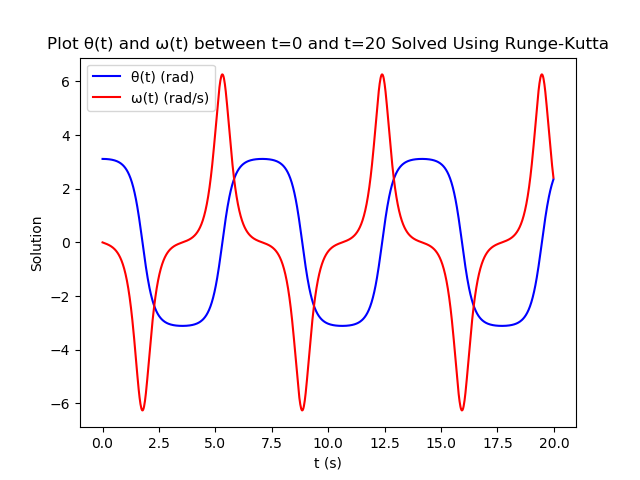

In [6]:
plt.figure()
plt.plot(tpoints,rsol[0],label='θ(t) (rad)', color='b') #the first row of rsol is theta(t)
plt.plot(tpoints,rsol[1],label='ω(t) (rad/s)', color='r') # the second row of rsol is omega(t)
plt.legend(loc="best")
plt.title("Plot θ(t) and ω(t) between t=0 and t=20 Solved Using Runge-Kutta")
plt.xlabel("t (s)")
plt.ylabel("Solution");

## Task 4:
We can now compare these results with a result where we use small angle approximation:

$$\sin \theta \approx \theta$$

To do this, we must define `pendelum_function` with the small angle approximation:

In [7]:
def pendelum_motion_approx(r,t): #new function with small angle approximation
    '''Definition of the vector function to be solved for the pendelum bob 
    subject to acceleration
    Inputs:
    r: vector of angular position (r[0]) and angular velocity (r[1])
    t: time point'''
    
    theta = r[0] # first element of r represents the angular position of the pendelum bob
    omega = r[1] # second element of r represents the angular velocoty of the pendelum bob
    
    f_theta = omega
    f_omega = (-g/L)*theta #small angle approximation applied here
    
    return np.array([f_theta,f_omega],float) # convert f_theta and f_theta to an array form and ensure it's a float

Define the Runge-Kutta function with `pendelum_motion_approx`:

In [8]:
rsol_approx = RungeKutta2d(r,tpoints,pendelum_motion_approx) 

Plot both $\theta(t)$ functions (with and without approximation) and both $\omega(t)$ functions on seperate plots:

<IPython.core.display.Javascript object>


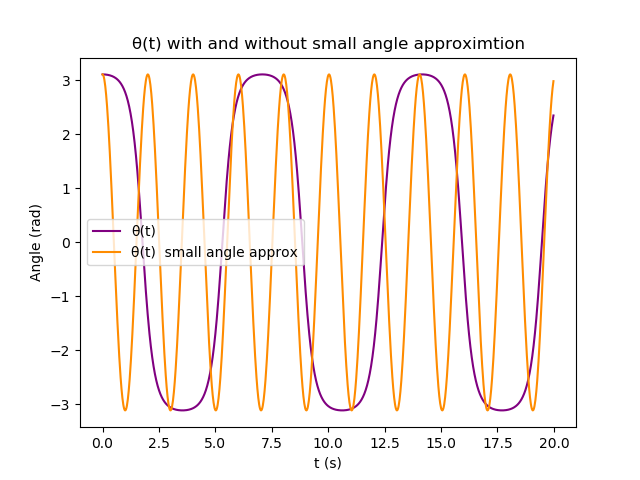

<IPython.core.display.Javascript object>


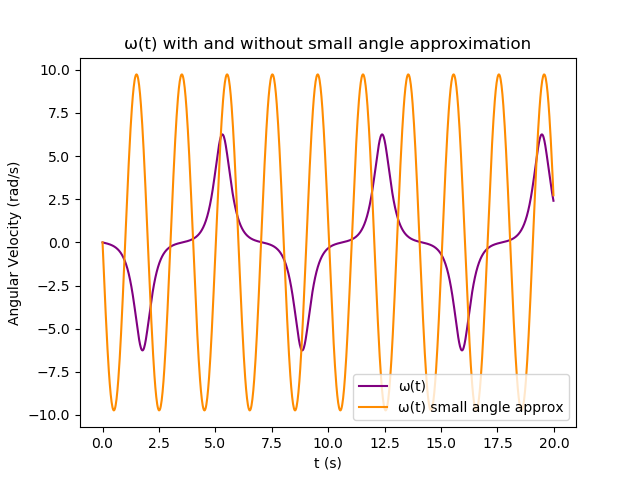

In [9]:
plt.figure()
plt.plot(tpoints,rsol[0],label='θ(t)', color='purple') #the first row of rsol is theta(t)
plt.plot(tpoints,rsol_approx[0], label = 'θ(t)  small angle approx', color='darkorange') #the first row of rsol_approx is theta(t)
plt.xlabel("t (s)")
plt.ylabel("Angle (rad)")
plt.legend(loc="best")
plt.title('θ(t) with and without small angle approximtion')
plt.show()

plt.figure()
plt.plot(tpoints,rsol[1],label='ω(t)',  color='purple') #the second row of rsol is omega(t)
plt.plot(tpoints,rsol_approx[1], label='ω(t) small angle approx', color='darkorange')#the second row of rsol_approx is omega(t) 
plt.legend(loc="best")
plt.title("ω(t) with and without small angle approximation")
plt.xlabel("t (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.show();

## Task 5:
We can include a damping term to make this pendelum set-up more realistic. This will change equation of motion:

$$
\frac{d \omega}{dt}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$

where $c$ is the damping coefficient ($c=0.01$) and $M$ is the mass of the bob ($M = 0.1 kg$). Therefore, we must, again, change the function:

In [10]:
def pendelum_motion_damping(r,t):
    '''Definition of the vector function to be solved
    Inputs are r (a vector of x and y) and t'''
    
    theta = r[0] # first element of r represents x, etc
    omega = r[1] # second element of r represents y, etc
    
    f_theta = omega
    f_omega = (-g/L)*np.sin(theta)-((c*omega)/(M*(L**2)))
    
    return np.array([f_theta,f_omega],float) #convert f_theta and f_omega to an array form and ensure it's a float

Define $M$, $C$ and the Runge-Kutta function with `pendelum_motion,damping`: 

In [11]:
M=0.1 #kg    
c=0.01

rsol_damping = RungeKutta2d(r,tpoints,pendelum_motion_damping) 

Plot all three $\theta(t)$ in one plot and all three $\omega(t)$ in another plot:

<IPython.core.display.Javascript object>


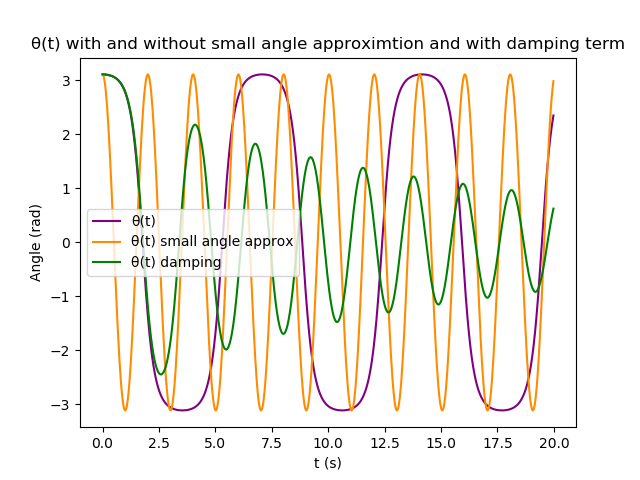

<IPython.core.display.Javascript object>


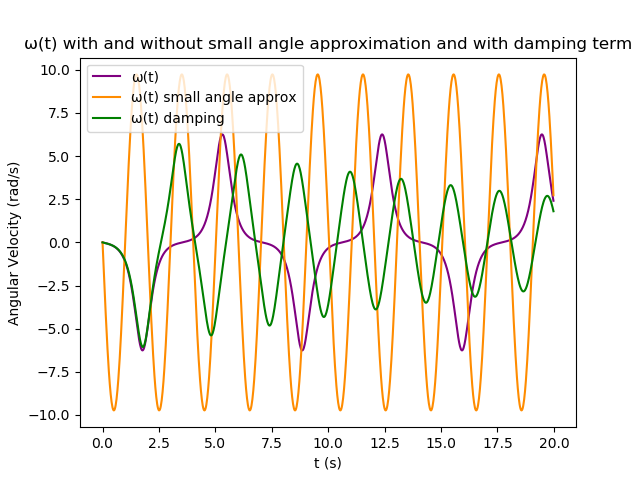

In [12]:
plt.figure()
plt.plot(tpoints,rsol[0],label='θ(t)', color='purple') #the first row of rsol is theta(t)
plt.plot(tpoints,rsol_approx[0], label = 'θ(t) small angle approx', color='darkorange') #the first row of rsol_approx is theta(t)
plt.plot(tpoints,rsol_damping[0], label = 'θ(t) damping', color='green') #the first row of rsol_damping is theta(t)
plt.xlabel("t (s)")
plt.ylabel("Angle (rad)")
plt.legend(loc="best")
plt.title('θ(t) with and without small angle approximtion and with damping term')
plt.show()

plt.figure()
plt.plot(tpoints,rsol[1],label='ω(t)',  color='purple') #the second row of rsol is omega(t)
plt.plot(tpoints,rsol_approx[1], label='ω(t) small angle approx', color='darkorange')#the second row of rsol_approx is omega(t)
plt.plot(tpoints,rsol_damping[1], label='ω(t) damping', color='green')#the second row of rsol_damping is omega(t)
plt.legend(loc="best")
plt.title("ω(t) with and without small angle approximation and with damping term")
plt.xlabel("t (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.show();

## Task 6:

We can animate our results and plot various graphs using vpython:

In [13]:
#The follwing code is pasted from the last code cell of 'PHAS0029 Session 7: More Ordinary Differential Equations', Author: Louise Dash louise.dash@ucl.ac.uk

from vpython import sphere, cylinder, color, rate, vector, gcurve, canvas, graph

win=450 # canvas window size parameter

##############################################################
### Set up the animation window objects
animation = canvas( width=win, height=win, align='left')

# first set up the objects:
pivot = vector(0,0,0) # pivot point at centre of display


### for the undamped system...
# the rigid rod connecting the bob to the pivot point...
rod = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.green, opacity = 0.5)

# ...and the bob.
bob = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.blue, opacity = 0.5)


### for the damped system
# the rigid rod connecting the bob to the pivot point...
rod_d = cylinder(pos=pivot, axis = vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.01, color=color.magenta)

# ...and the bob.
bob_d = sphere(pos=vector(L*np.sin(initialtheta),-L*np.cos(initialtheta),0), 
                      radius = 0.1, color=color.purple)

###################################################################
### Set up the graph windows 
### see https://www.glowscript.org/docs/VPythonDocs/graph.html for info and documentation

graph1 = graph(width=win, height=win/2, align="right",
      title='<b> θ (cyan), ω (red)</b>',
      xtitle='<i>time (s)</i>', ytitle='<i>θ (rads), ω (rads/s)</i>',
      foreground=color.black, background=color.white,
      xmin=0, xmax=20, ymin=-6, ymax=6)

graph2 = graph(width=win, height=win/2, align="right",
      title='<b>Phase space: undamped (green), damped (magenta) </b>',
      xtitle='<i>θ (rads) </i>', ytitle='<i>ω (rads/s)</i>',
      foreground=color.black, background=color.white,
      xmin=-4, xmax=4, ymin=-7, ymax=7)

# set up the curve objects for the plots
anglecurve = gcurve(graph=graph1, color=color.cyan) # a graphics curve for the *angle*
velcurve = gcurve(graph=graph1, color=color.red)    # a graphics curve for the *angular velocity*, etc
phasecurvedamp = gcurve(graph=graph2, color=color.magenta)
phasecurveundamp = gcurve(graph=graph2, color=color.green)


####################################################################
# Run the animation:
# Loop over the solutions already calculated 
for i in range(0,N):
    
    ### Main vpython animation:
    angle = rsol[0,i]         # undamped solution
    angle_d = rsol_damping[0,i] # damped solution
                              # you may need to edit the variable names

    
    # depending on your own implementation
    
    ## undamped system:
    # change the axis of the bob
    rod.axis = vector(L*np.sin(angle), -L*np.cos(angle),0)
    #update the position of the bob:
    bob.pos = vector(L*np.sin(angle),-L*np.cos(angle),0)
    
    ## damped system:
    #
    #
    # ADD CODE AND COMMENTS HERE TO ANIMATE FOR THE DAMPED SYSTEM 
    # USING YOUR RESULTS FROM ABOVE
    #
    
    # change the axis of the bob
    rod_d.axis = vector(L*np.sin(angle_d), -L*np.cos(angle_d),0)
    #update the position of the bob:
    bob_d.pos = vector(L*np.sin(angle_d),-L*np.cos(angle_d),0)
    
    
    
    
    

    ### Plot window animations
    tpoint = i*tend/N # scale the t-component manually
    ## Update the curves with the current animation point:
    
    
    
    # first for the plot of posn and velocity against time...
    anglecurve.plot(tpoint,rsol_damping[0,i] ) 
    # ADD A LINE OF CODE HERE TO COMPLETE THE CURVE OF $\omega$ AGAINST t
    velcurve.plot(tpoint,rsol_damping[1,i] ) 
    
    
    # ...then for the plot in phase space
    # ADD CODE HERE TO ANIMATE THE PLOT OF $\omega$ AGAINST $\theta$
    # FOR THE UNDAMPED (use phasecurveundamp object) AND DAMPED
    # (use phasecurvedamp object) SOLUTIONS # ddamped  
    phasecurveundamp.plot(rsol[0,i], rsol[1,i] ) #undamped plot
    phasecurvedamp.plot(rsol_damping[0,i], rsol_damping[1,i] ) #damped plot
    
    
    rate(50) # framerate for all windows
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The phase plot is showing that there is no decrease in either $\omega$ or $\theta$ for the undamped pendelum. But there is a gradual decrease for the damped pendelum (as expected). This is why there is a decreasing spiral radius shown for the damped plot but no change for the undamped plot. The initial couple of seconds of the swing, both the undpamped and damped pendelums had the same plot. Thereafter, the damped pendelum showed a gradually decreasing spiral radius.